In [74]:
import numpy as np
from scipy import integrate, interpolate
import matplotlib.pyplot as plt

import MicroTools as micro
from MicroTools import unfolder
import MiniTools as mini
import const
import param_scan

In [154]:
from importlib.resources import open_text
mode='fhc'
bar=''
MiniBooNE_Signal = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}nue{bar}fullosc_ntuple.txt",
        )
    )
nue_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}data_lowe.txt",
        )
    )
numu_data = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_numu{bar}data.txt",
        )
    )

nue_bkg = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_nue{bar}bgr_lowe.txt",
        )
    )
numu_MC = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode", f"miniboone_numu{bar}.txt"
        )
    )

fract_covariance = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.{mode}mode",
            f"miniboone_full_fractcovmatrix_nu{bar}_lowe.txt",
        )
    )

    # energy bins -- same for nu and nubar
bin_e = np.genfromtxt(
        open_text(
            f"MiniTools.include.MB_data_release_2020.combined",
            f"miniboone_binboundaries_nue_lowe.txt",
        )
    )
bin_widths = np.diff(bin_e)

In [155]:
# Load the MiniBooNE MC from data release
LMBT = 0.4685  # Baseline length in kilometers
Ereco = MiniBooNE_Signal[:, 0] # MeV
Etrue = MiniBooNE_Signal[:, 1] # MeV
Length = MiniBooNE_Signal[:, 2] / 100000  # Kilometers
Weight = MiniBooNE_Signal[:, 3] / len(MiniBooNE_Signal[:, 3])

In [156]:
flux = np.genfromtxt('MiniTools/include/fluxes/MiniBooNE_FHC.dat')
enu = flux[:,0]*1e3 # MeV
F_nue = interpolate.interp1d(enu, flux[:,1], bounds_error=False, fill_value=0)
F_numu = interpolate.interp1d(enu, flux[:,2], bounds_error=False, fill_value=0)

In [157]:
def P(Enu, L, sin2thetaSQR=0.807, dmSQR=0.043):
    Enu = 1e-3 * Enu
    return sin2thetaSQR * np.sin(1.27*dmSQR * L/Enu)**2

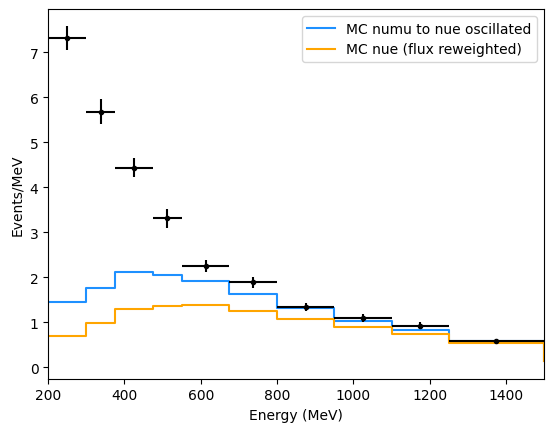

In [166]:
normalization = bin_widths

MC_numu_osc, _ = np.histogram(Ereco, weights=Weight*P(Etrue, Length), bins=bin_e, density=False)
MC_nue, _ = np.histogram(Ereco, weights=Weight*F_nue(Etrue)/F_numu(Etrue), bins=bin_e, density=False)
# 
plt.step(bin_e[:-1], (MC_numu_osc+MC_nue)/normalization, where='post', color='dodgerblue', label='MC numu to nue oscillated')
plt.step(bin_e[:-1], MC_nue/normalization, where='post', color='orange', label='MC nue (flux reweighted)')
data_counts, _ = np.histogram(bin_e[:-1], weights=nue_data, bins=bin_e, density=False)
plt.errorbar(bin_e[:-1]+bin_widths/2, data_counts/normalization, xerr=bin_widths/2, yerr=np.sqrt(data_counts)/normalization, fmt='k.', ecolor='black')

plt.xlim(200,1500)
plt.ylabel('Events/MeV')
plt.xlabel('Energy (MeV)')
plt.legend()


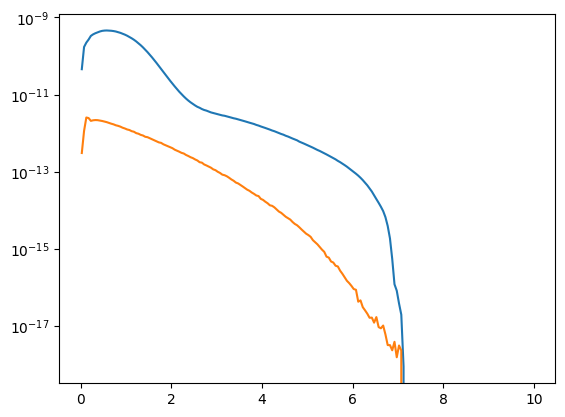

In [27]:
plt.plot(enu, F_numu(enu))
plt.plot(enu, F_nue(enu))

plt.yscale('log')